In [297]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser
from datetime import datetime

In [298]:
df1 = pd.read_excel('O2D_delay_data.xlsx', 'logistics')
df2 = pd.read_excel('O2D_delay_data.xlsx', 'po_level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d
0,1,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,2.661817,0.149317,0.945463
1,2,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,2.727789,1.072928,4.859950
2,3,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,2.777789,0.979178,4.934950
3,4,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,2.020845,0.854178,3.006570
4,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850


In [299]:
df2_selected_cols = df2[['buyer_name', 'seller_name', 'seller_po_number',
       'transporter_type', 'order_type',
       'order_completion_percentage', 'o2d_', 'O2D_Bucket']]
df = df1.merge(df2_selected_cols, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

# ## removing all the po which has NA in dispatched_qty
# dispatch_qty_na_po = set(df[df['dispatched_qty'].isna()]['po_number'].unique())
# print('Shape of df before filtering the po with NAN dispatch_qty')
# print(df.shape)
# df = df[~df['po_number'].isin(dispatch_qty_na_po)]
# print('Shape of df after filtering the po with NAN dispatch_qty')
print(df.shape)

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'
df.loc[(df['transporter_type'] == 'Bizongo Non O2D'), 'transporter_type'] = 'Bizongo'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')
df = df[~df['po_number'].isin(['PO/25/MH/498','PO/25/MH/564', 'PO/25/MH/568'])
df = df[~df['po_qty'].isna()]

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()
df['lane_order'] = df.groupby('route')[['po_ts']].rank(method='min')


### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

SyntaxError: '[' was never closed (1474615790.py, line 23)

In [300]:
df[df['dispatched_qty'].isna()]

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d,buyer_name,seller_name,seller_po_number,transporter_type,order_type,order_completion_percentage,o2d_,O2D_Bucket,order,lane_order,Month,total_rounds,unloading_time_total,reached_to_payment_tat,payment_to_unloading_tat,seller_total_time,vehicle_reported_to_load_tat,vehicle_loaded_to_dispatch_tat,transporter_time,transporter_indent_to_accept_tat,transporter_accept_to_placement_tat,vehicle_indent_to_accept_tat,po_ts_to_expected_reporting,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,steel,al,qty_reached_till_now,qty_%,%_bucket
0,152,2024-07-04,PO/25/CG/18,30.0,2024-07-04,RMC - Aluminium,NaN,Raipur,Medak,NaN,2024-07-04 08:31:02,07/04/2024 11:31:02,2024-07-04 11:31:02,07/04/2024 11:31:02,2024-07-04 11:31:02,07/04/2024 11:31:02,2024-07-04 12:31:02,07/04/2024 13:45:00,2024-07-05 18:10:00,2024-07-05 18:20:00,NaN,NaT,NaN,0.125012,0.000012,0.000012,0.093044,1.190984,0.051354,0.000012,2.236111,0.000000,NaN,Sagar Asia Private Limited,JAGDAMBA STEELS,PO/25/CG/18,Bizongo,S2B,98.416667,1.000000,0-3 days,NaN,2.0,July,1,NaN,NaN,NaN,1.190972,1.184028,0.006944,0.051354,0.000000,0.093032,0.000000,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,raipur-medak,0,1,NaN,NaN,NaN
72,146,2024-06-27,PO/25/HA/664,126.0,2024-06-27,RMC - Steel,NaN,Bardhaman,Jaipur,July 1 Week,NaT,06/28/2024 11:28:00,2024-06-28 11:28:00,06/28/2024 12:00:00,2024-06-28 12:30:00,06/30/2024 20:08:00,2024-06-28 14:00:00,07/01/2024 06:32:00,2024-07-01 12:10:00,2024-07-02 12:00:00,07/05/2024 22:00:00,2024-07-06 14:32:00,07/07/2024 01:30:00,-9.522211,0.000012,2.361123,0.433345,1.227789,2.688877,0.022234,3.416678,1.145845,NaN,AVS INFRA PROJECT,SHREESATYA STEEL & POWER PRIVATE LIMITED,PO/25/HA/664,Bizongo,S2B,99.587302,5.664967,3-6 days,2.0,NaN,NaN,4,1.145833,0.688889,0.456944,1.227778,0.234722,0.993056,2.688877,0.020833,2.751389,0.043056,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bardhaman-jaipur,1,0,NaN,NaN,NaN
100,133,2024-06-19,PO/25/MH/572,210.0,2024-06-19,RMC - Steel,NaN,Raipur,Jalna,June 4 Week,2024-06-19 17:45:00,06/20/2024 10:06:00,2024-06-20 13:06:00,06/20/2024 14:00:00,2024-06-20 14:30:00,06/29/2024 11:13:00,2024-06-23 13:00:00,06/29/2024 11:33:00,2024-06-29 15:45:00,2024-07-01 19:00:00,07/03/2024 07:52:00,NaT,NaN,0.681262,0.125012,8.921539,0.013900,2.310428,5.939572,0.162512,1.536123,4.672222,12.0521,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,PO/25/MH/572,Bizongo,S2B,100.485714,4.299592,3-6 days,6.0,24.0,June,6,NaN,NaN,NaN,2.310417,0.175000,2.135417,5.939572,0.020833,8.877083,0.058333,3.802083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,raipur-jalna,1,0,NaN,NaN,NaN
105,144,2024-06-24,PO/25/MH/602,30.0,2024-06-24,RMC - Aluminium,NaN,Raipur,Raipur,July 1 We

In [301]:
from datetime import datetime
import pandas as pd
import numpy as np

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str.strftime("%m/%d/%Y %H:%M:%S")
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Remove any extra spaces before the time part
        date_str = date_str.strip()
        if ' :' in date_str:
            date_str = date_str.replace(' :', ' ')
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Try different possible input formats for string inputs
        possible_formats = [
            "%m/%d/%y %H:%M:%S",
            "%m/%d/%Y %H:%M:%S",
            "%-m/%-d/%y %H:%M:%S",   # Single-digit month and day
            "%-m/%-d/%Y %H:%M:%S",   # Single-digit month and day
        ]
        
        for fmt in possible_formats:
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt.strftime("%m/%d/%Y %H:%M:%S")
            except ValueError:
                pass
        
    raise ValueError(f"Date format not recognized for '{date_str}'")



###############    Unloading Data     #############
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))
df['payment_confirmation_received_by_ops'] = df['payment_confirmation_received_by_ops'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_reached_delivery_location_ts'] = pd.to_datetime(df['vehicle_reached_delivery_location_ts'])
df['payment_confirmation_received_by_ops'] = pd.to_datetime(df['payment_confirmation_received_by_ops'])
df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])


df['unloading_time_total'] = (df['vehicle_unloaded_ts'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['reached_to_payment_tat'] = (df['payment_confirmation_received_by_ops'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['payment_to_unloading_tat'] = (df['vehicle_unloaded_ts'] - df['payment_confirmation_received_by_ops']).dt.total_seconds() / (3600 * 24)



############    Seller Level   ##########

df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_loaded_ts'] = df['vehicle_loaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
df['vehicle_reported_ts'] = pd.to_datetime(df['vehicle_reported_ts'])
df['vehicle_loaded_ts'] = pd.to_datetime(df['vehicle_loaded_ts'])


df['seller_total_time'] = (df['vehicle_dispatched_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_reported_to_load_tat'] = (df['vehicle_loaded_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_loaded_to_dispatch_tat'] = (df['vehicle_dispatched_ts'] - df['vehicle_loaded_ts']).dt.total_seconds() / (3600 * 24)

###########   Transporter Level    ########33

df['nextbuy_vehicle_indent_ts'] = df['nextbuy_vehicle_indent_ts'].apply(lambda x: convert_date_format(x))
# df['vehicle_placement_ts'] = df['vehicle_placement_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))


df['transporter_time'] = df['vehicle_reported_actual_vs_expected']
df['transporter_indent_to_accept_tat'] = (pd.to_datetime(df['transporter_order_indent_acceptance_ts']) - pd.to_datetime(df['transporter_order_indent_ts'])).dt.total_seconds() / (3600 * 24)
df['transporter_accept_to_placement_tat'] = (pd.to_datetime(df['vehicle_reported_ts']) - pd.to_datetime(df['transporter_order_indent_acceptance_ts'])).dt.total_seconds() / (3600 * 24)




#############     Internal      ################
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'], errors='coerce')
df['nextbuy_vehicle_indent_ts'] = pd.to_datetime(df['nextbuy_vehicle_indent_ts'].apply(convert_date_format))
df['transporter_order_indent_acceptance_ts'] = pd.to_datetime(df['transporter_order_indent_acceptance_ts'].apply(convert_date_format))


df['po_ts'] = pd.to_datetime(df['po_ts'], errors='coerce')
df['expected_date_of_vehicle_reporting'] = pd.to_datetime(df['expected_date_of_vehicle_reporting'], errors='coerce')
df['vehicle_indent_to_accept_tat'] = (df['transporter_order_indent_acceptance_ts'] - df['nextbuy_vehicle_indent_ts']).dt.total_seconds() / (3600 * 24)


df['po_ts_to_expected_reporting'] = (df['expected_date_of_vehicle_reporting'] - df['po_ts']).dt.total_seconds() / (3600 * 24)



route = df[['route']]
df = pd.get_dummies(df, columns=['route'], prefix='route')
df = df.replace({True: 1, False: 0})
df = pd.concat([df, route], axis=1)

# df[df['delay_in_unloading'] >= 1].head()


df['steel'] = df['category'].apply(lambda x : 1 if x == 'RMC - Steel' else 0)
df['al'] = df['steel'].apply(lambda x : 1 if x == 0 else 0)

In [302]:
non_april = df[df['Month'] != 'April']

In [303]:
selected_cols = [ 'po_qty', 'dispatched_qty', 'nextbuy_order_indent_tat',
       'nextbuy_vehicle_indent_tat', 'vehicle_placement_tat',
       'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'dispatch_to_delivery_tat', 'unloading_tat',
        'o2d_','unloading_time_total', 'reached_to_payment_tat',
       'payment_to_unloading_tat',
       'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat',
        'transporter_indent_to_accept_tat',
       'transporter_accept_to_placement_tat', 'vehicle_indent_to_accept_tat',
       'po_ts_to_expected_reporting', 'transporter_time', 'seller_total_time',
                 
                 
                 
                 'route_bardhman-jaipur',
       'route_durgapur-beawer', 'route_durgapur-jaipur', 'route_durgapur-pali',
       'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_korba-bhubneshawar', 'route_raipur-ahmedabad',
       'route_raipur-bavla', 'route_raipur-gandhinagar',
       'route_raipur-hadapsar', 'route_raipur-jalna', 'route_raipur-kheda',
       'route_raipur-medak', 'route_raipur-mehsana', 'route_raipur-raipur',
       'route_raipur-varanasi', 'route_ramgarh-jaipur',
       'route_visakhapatnam-kheda', 'route_visakhapatnam-medak', 'steel',
       'al']

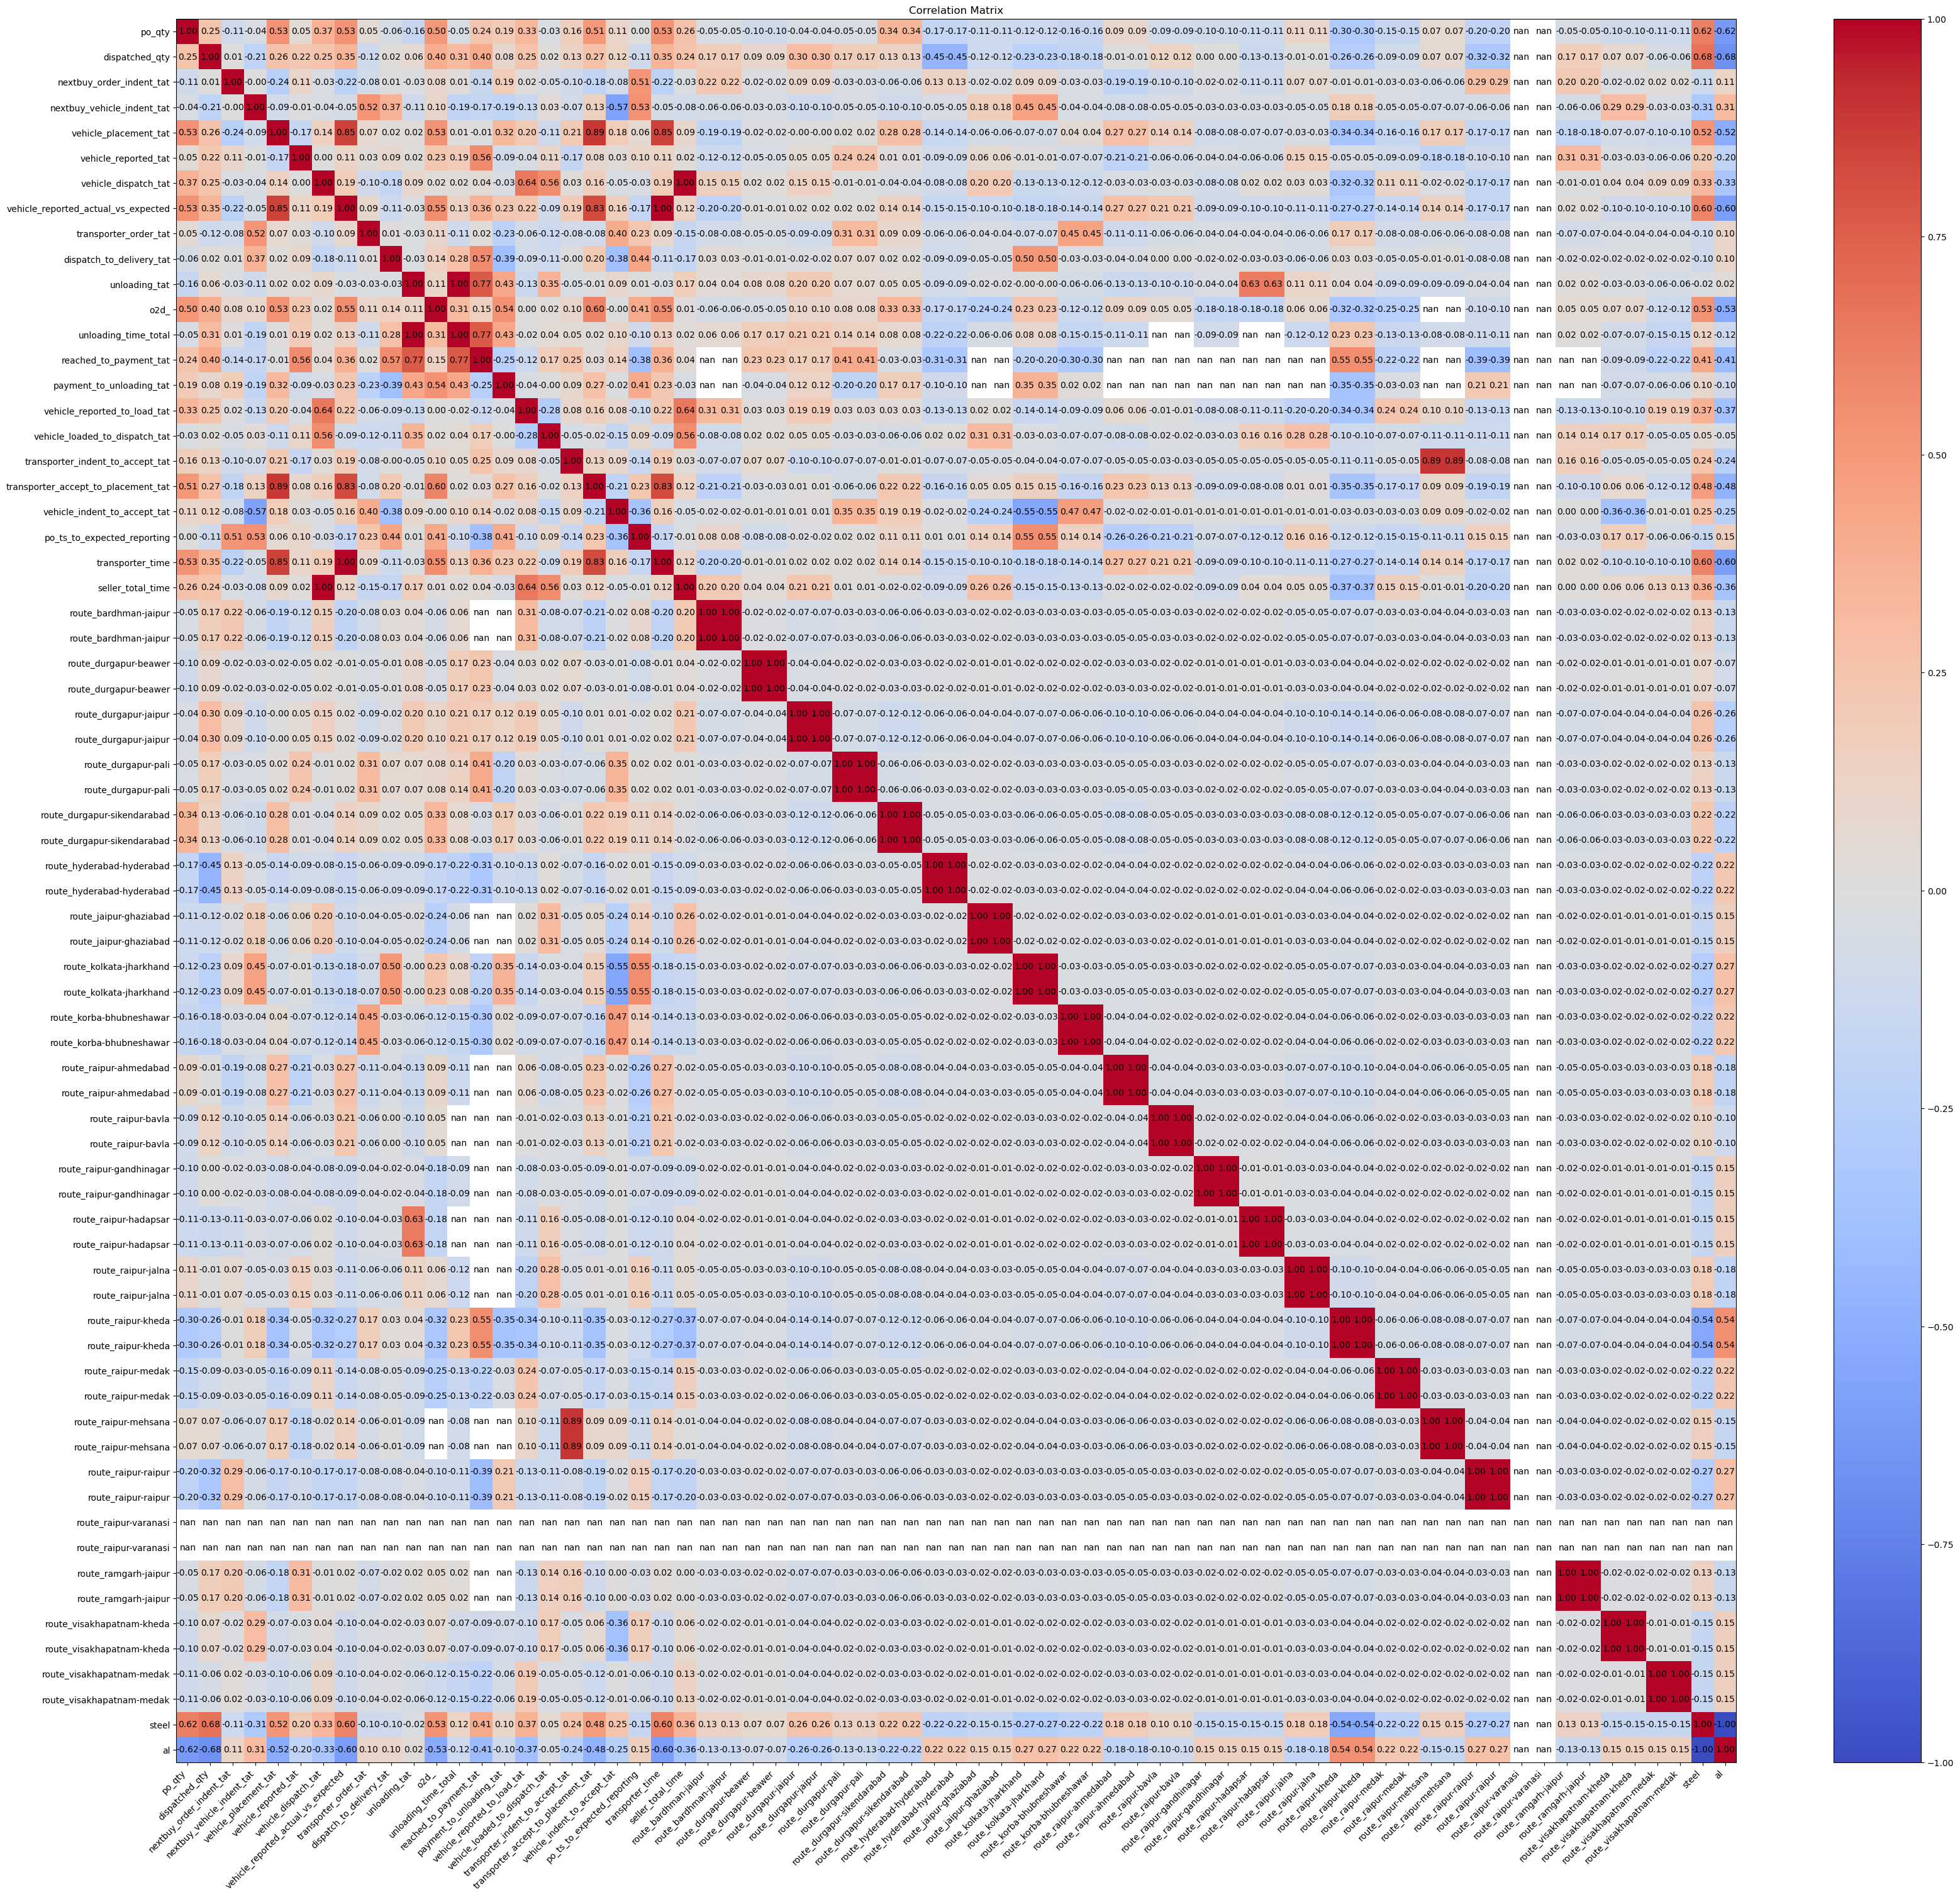

In [305]:
numeric_cols = non_april.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = non_april[selected_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(40, 36))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [267]:
new_cols = [ 'po_qty', 'dispatched_qty', 'nextbuy_order_indent_tat',
       'nextbuy_vehicle_indent_tat', 'vehicle_placement_tat',
       'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'dispatch_to_delivery_tat', 'unloading_tat',
        'o2d_','unloading_time_total', 'reached_to_payment_tat',
       'payment_to_unloading_tat',
       'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat',
        'transporter_indent_to_accept_tat',
       'transporter_accept_to_placement_tat', 'vehicle_indent_to_accept_tat',
       'po_ts_to_expected_reporting', 'transporter_time', 'seller_total_time']

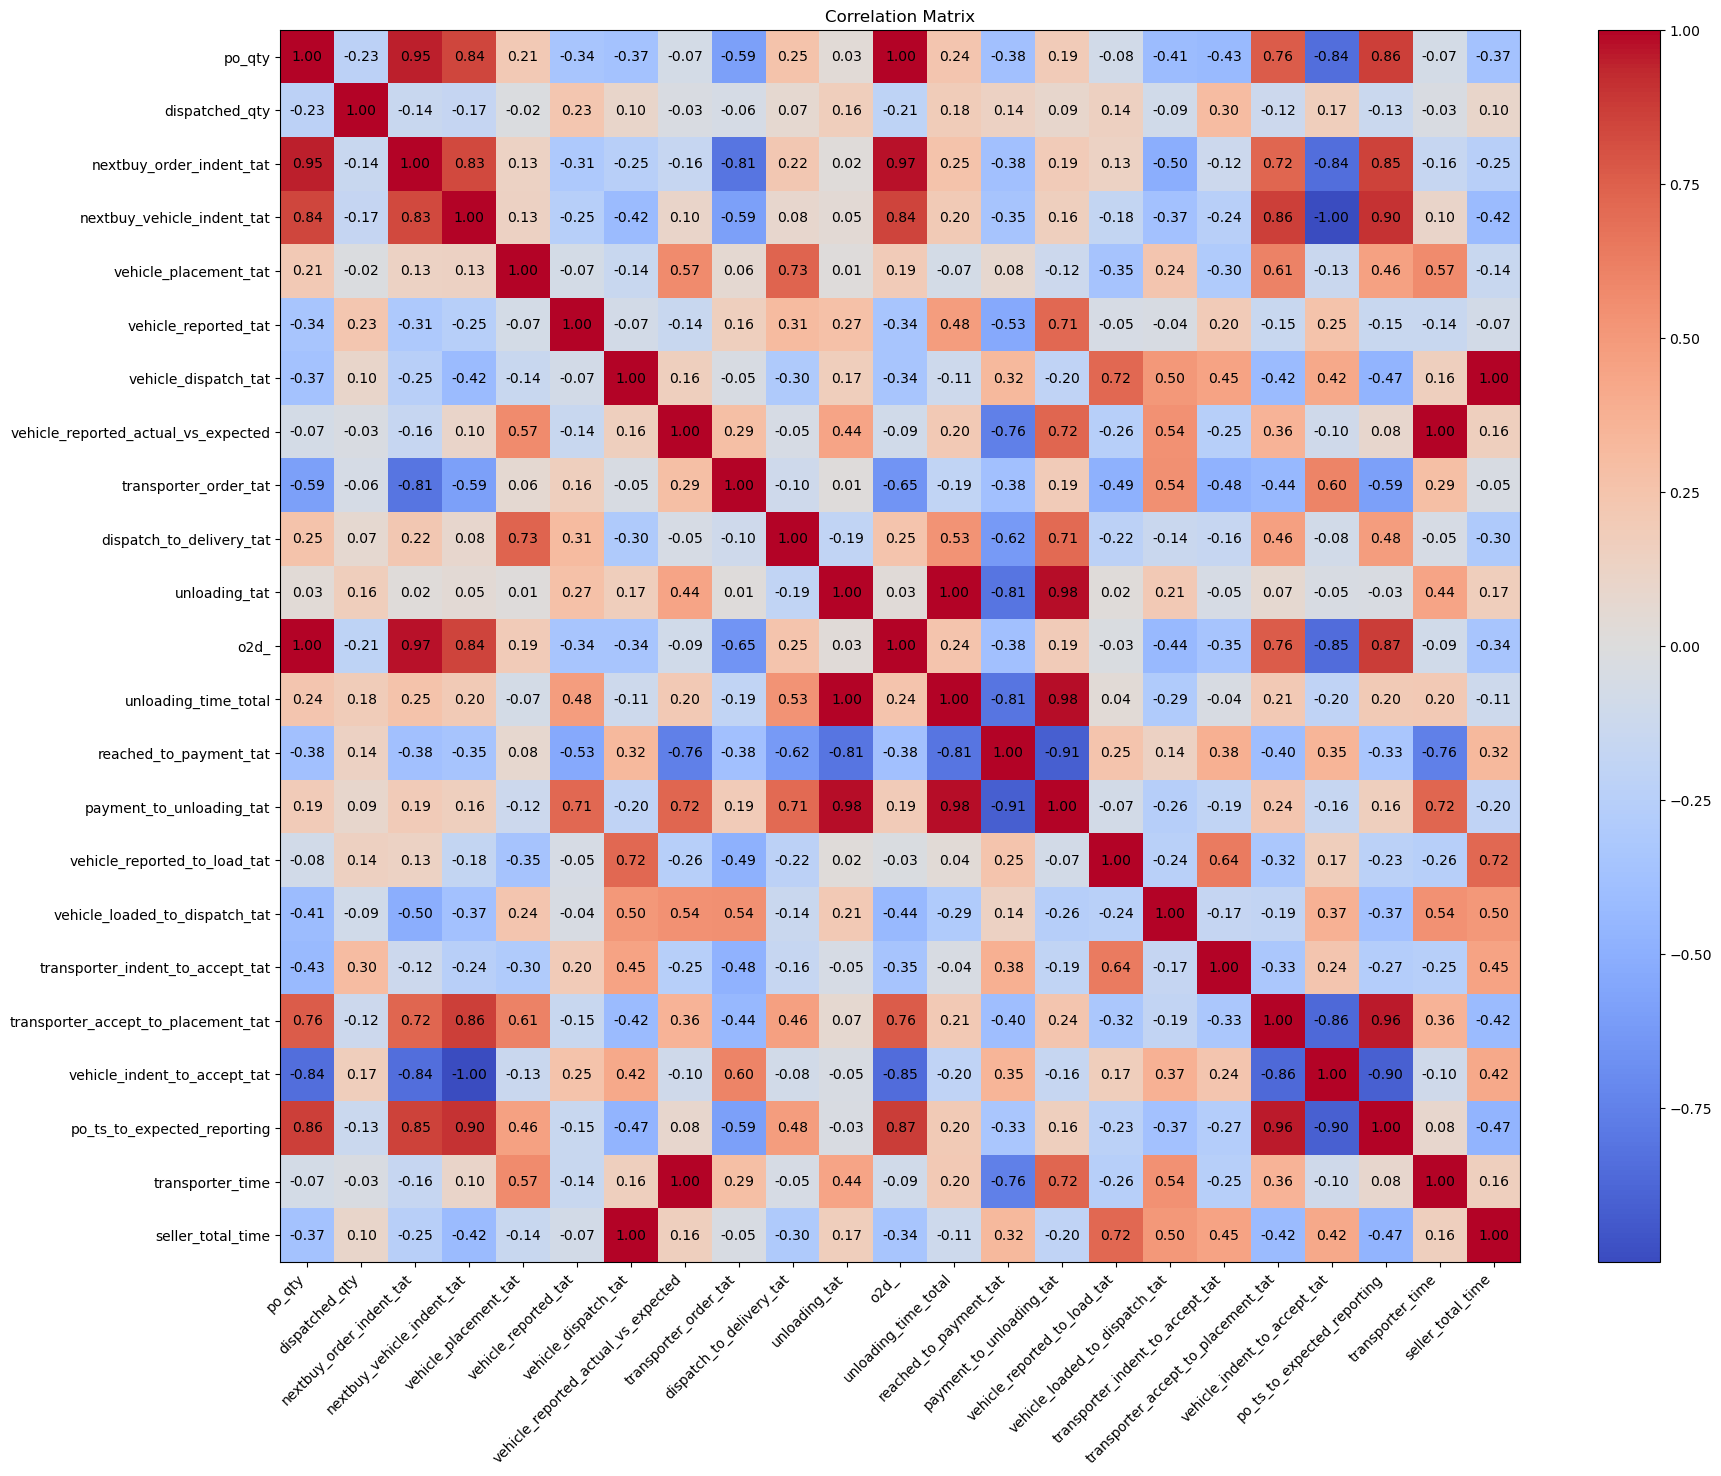

In [268]:
raipur_jalna = df[df['route'] == 'raipur-jalna']
numeric_cols = raipur_jalna.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = raipur_jalna[new_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(20, 16))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [269]:
raipur_jalna.pivot_table(index = 'order', columns = ['Month','category'], aggfunc = {'o2d_' : 'mean',  'po_ts_to_expected_reporting' :'mean','transporter_time' : 'mean', 'seller_total_time' : 'mean' }).round(2)


o2d_             po_ts_to_expected_reporting              \
Month          April        June                       April        June   
category RMC - Steel RMC - Steel                 RMC - Steel RMC - Steel   
order                                                                      
1.0            13.19         4.3                       11.77        2.68   
2.0            13.19         4.3                       13.27        1.68   
3.0            13.19         4.3                       11.77        1.68   
4.0            13.19         4.3                        9.27        1.68   
5.0            13.19         4.3                        9.27        3.78   
6.0            13.19         4.3                        8.77        3.80   
7.0            13.19         NaN                       10.27         NaN   
8.0            13.19         NaN                       12.27         NaN   
9.0            17.03         NaN                       17.33         NaN   
10.0           17.03         NaN                       18.33         NaN   
11.0           17.03         NaN                       18.33         NaN   
12.0           17.03         NaN                       18.33         NaN   
13.0           17.03         NaN                       15.33         NaN   

         seller_total_time             transporter_time              
Month                April        June            April        June  
category       RMC - Steel RMC - Steel      RMC - Steel RMC - Steel  
order                                                                
1.0                   1.19        1.00             0.06       -0.83  
2.0                   0.82        0.28            -0.35        0.15  
3.0                   1.39        0.98            -0.06        0.23  
4.0                   0.86        0.30            -0.63        0.14  
5.0                   0.73        0.40            -0.58        0.99  
6.0                   1.23        2.31            -0.42        5.94  
7.0                   1.22         NaN            -0.54         NaN  
8.0                   0.66         NaN             0.00         NaN  
9.0                   0.27         NaN            -0.41         NaN  
10.0                  0.28         NaN             2.55         NaN  
11.0                  1.07         NaN             2.70         NaN  
12.0                  0.17         NaN             2.68         NaN  
13.0                  0.37         NaN             1.45         NaN

In [270]:
raipur_jalna.groupby(['po_number','Month'])[['po_qty', 'o2d_', 'po_ts_to_expected_reporting', 'seller_total_time', 'transporter_time', 'total_rounds']].mean().round(2)


,,po_qty,o2d_,po_ts_to_expected_reporting,seller_total_time,transporter_time,total_rounds
po_number,Month,,,,,,
PO/25/MH/572,June,210.0,4.30,2.55,0.88,1.10,6.0
PO/25/MH/73,April,300.0,9.35,8.34,1.27,-0.22,8.0
PO/25/MH/88,April,500.0,17.03,15.87,0.57,0.39,15.0


/tmp/ipykernel_54727/1586609138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raipur_jalna[columns_to_normalize] = scaler.fit_transform(raipur_jalna[columns_to_normalize])


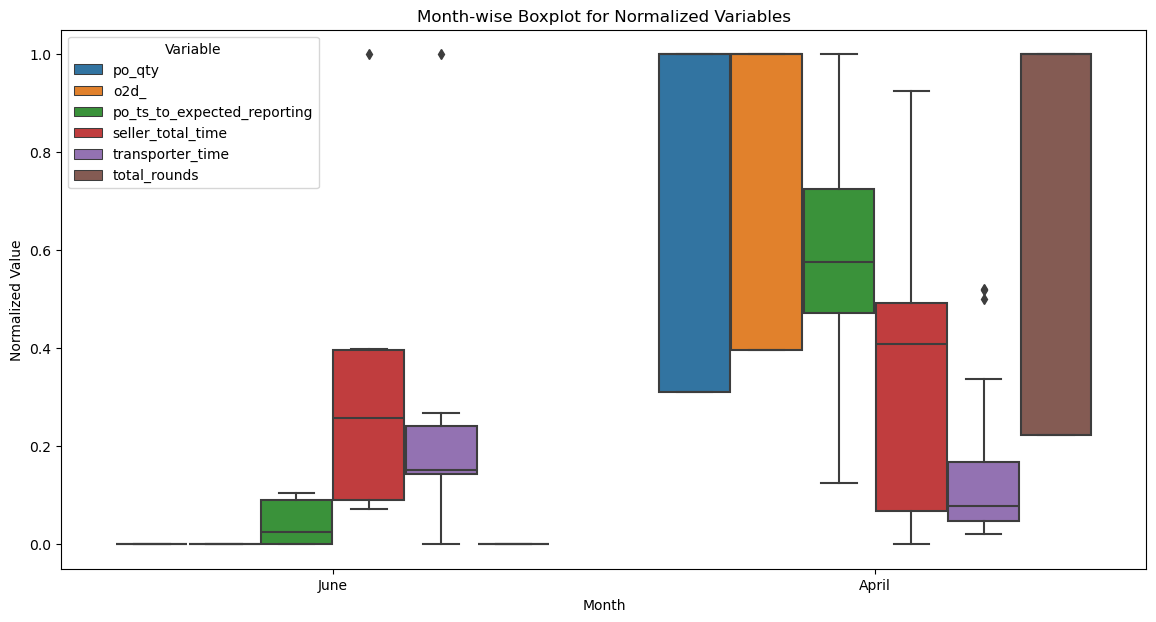

In [271]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['po_qty', 'o2d_', 'po_ts_to_expected_reporting', 'seller_total_time', 'transporter_time', 'total_rounds']

# Normalize the columns to the range 0 to 1
scaler = MinMaxScaler()
raipur_jalna[columns_to_normalize] = scaler.fit_transform(raipur_jalna[columns_to_normalize])

# Melt the DataFrame to make it suitable for Seaborn boxplot
df_melted = raipur_jalna.melt(id_vars=['Month'], value_vars=columns_to_normalize, 
                              var_name='variable', value_name='value')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create the boxplot
sns.boxplot(x='Month', y='value', hue='variable', data=df_melted)

# Customize the plot
plt.title('Month-wise Boxplot for Normalized Variables')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.legend(title='Variable')

# Show the plot
plt.show()


In [272]:
raipur_jalna.groupby(['po_number','Month'])[['po_qty', 'o2d_','nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'po_ts_to_expected_reporting']].mean().round(2)


,,po_qty,o2d_,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_indent_to_accept_tat,po_ts_to_expected_reporting
po_number,Month,,,,,,
PO/25/MH/572,June,0.00,0.0,0.68,0.13,0.06,0.04
PO/25/MH/73,April,0.31,0.4,2.07,4.69,-4.65,0.33
PO/25/MH/88,April,1.00,1.0,2.96,10.15,-10.09,0.70


In [273]:
non_raipur_jalna = df[~df['po_number'].isin(set(raipur_jalna['po_number']))]
non_raipur_jalna = non_raipur_jalna[non_raipur_jalna['Month'] == 'April']
non_raipur_jalna.groupby(['po_number','Month'])[['po_qty', 'o2d_', 'po_ts_to_expected_reporting', 'seller_total_time', 'transporter_time', 'total_rounds']].mean().round(2)


,,po_qty,o2d_,po_ts_to_expected_reporting,seller_total_time,transporter_time,total_rounds
po_number,Month,,,,,,
PO/25/HA/111,April,600.0,14.76,8.43,0.71,5.58,17.0
PO/25/HA/128,April,300.0,16.20,10.34,1.04,5.14,10.0
PO/25/HA/130,April,500.0,13.83,6.43,1.05,6.61,14.0
PO/25/MH/124,April,12.0,2.00,2.66,0.30,-0.51,1.0
PO/25/MH/94,April,30.0,6.00,6.29,0.12,-0.41,1.0
PO/25/MH/96,April,60.0,1.99,2.19,0.23,-0.45,2.0


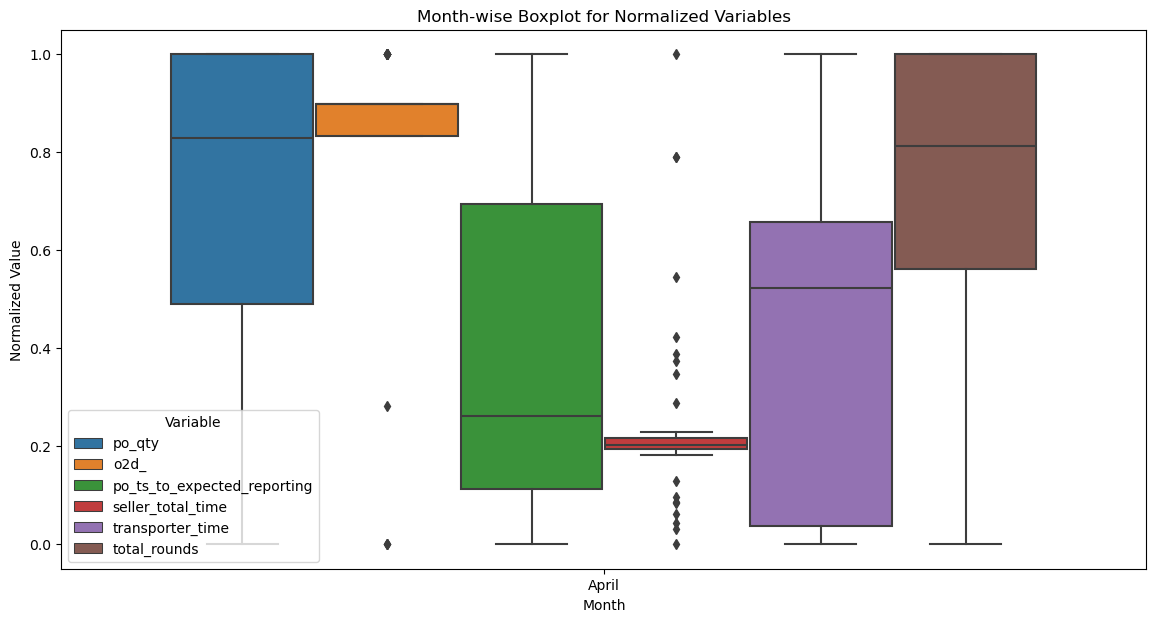

In [274]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['po_qty', 'o2d_', 'po_ts_to_expected_reporting', 'seller_total_time', 'transporter_time', 'total_rounds']

# Normalize the columns to the range 0 to 1
scaler = MinMaxScaler()
non_raipur_jalna[columns_to_normalize] = scaler.fit_transform(non_raipur_jalna[columns_to_normalize])

# Melt the DataFrame to make it suitable for Seaborn boxplot
df_melted = non_raipur_jalna.melt(id_vars=['Month'], value_vars=columns_to_normalize, 
                              var_name='variable', value_name='value')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create the boxplot
sns.boxplot(x='Month', y='value', hue='variable', data=df_melted)

# Customize the plot
plt.title('Month-wise Boxplot for Normalized Variables')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.legend(title='Variable')

# Show the plot
plt.show()


/tmp/ipykernel_54727/1758685548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_sik[columns_to_normalize] = scaler.fit_transform(dur_sik[columns_to_normalize])


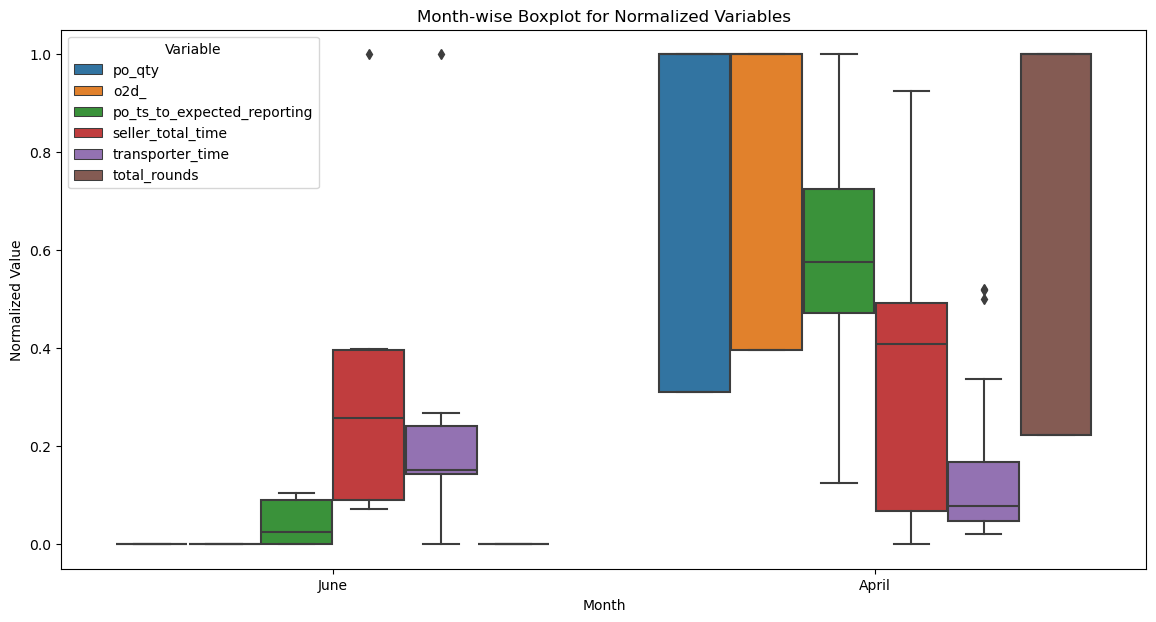

In [275]:
dur_sik = df[df['route'] == 'durgapur-sikendarabad']

from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['po_qty', 'o2d_', 'po_ts_to_expected_reporting', 'seller_total_time', 'transporter_time', 'total_rounds']

# Normalize the columns to the range 0 to 1
scaler = MinMaxScaler()
dur_sik[columns_to_normalize] = scaler.fit_transform(dur_sik[columns_to_normalize])

# Melt the DataFrame to make it suitable for Seaborn boxplot
df_melted = raipur_jalna.melt(id_vars=['Month'], value_vars=columns_to_normalize, 
                              var_name='variable', value_name='value')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create the boxplot
sns.boxplot(x='Month', y='value', hue='variable', data=df_melted)

# Customize the plot
plt.title('Month-wise Boxplot for Normalized Variables')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.legend(title='Variable')

# Show the plot
plt.show()


In [276]:
dur_sik.groupby(['po_number','Month'])[['po_qty', 'o2d_','nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'po_ts_to_expected_reporting']].mean().round(2)


,,po_qty,o2d_,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_indent_to_accept_tat,po_ts_to_expected_reporting
po_number,Month,,,,,,
PO/25/HA/111,April,1.0,0.86,0.94,0.0,0.77,0.49
PO/25/HA/128,April,0.0,1.00,0.01,0.0,0.07,0.61
PO/25/HA/590,June,0.0,0.00,0.02,0.0,0.66,0.10


## Order completion % analysis on all the veticals

In [277]:
# df['qty_reached'] = 0
# df_temp = pd.DataFrame()
# for po_number in unique_po:
#     temp = df[df['po_number'] == po_number].copy()
#     temp = temp.sort_values(by = ['order'])
#     temp['qty_reached'].iloc[0] = temp['po_qty'].iloc[0]
#     for i in range(1, len(temp)):
#         temp['qty_reached'].iloc[i] = temp['qty_reached'].iloc[i-1] + temp['po_qty'].iloc[i]
#     df_temp = pd.concat([df_temp, temp])

df = df.sort_values(by = ['po_number', 'order'])
df['qty_reached_till_now'] = df.groupby(['po_number'])['dispatched_qty'].cumsum()
df['qty_%'] = (df['qty_reached_till_now']*100) / df['po_qty']

bins = [0, 20, 40, 60, 80, 1000]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['%_bucket'] = pd.cut(df['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)


In [278]:
df.pivot_table(index = '%_bucket', columns = ['category', 'Month'], aggfunc = {'o2d_' : 'mean'})

o2d_                                                  \
category RMC - Aluminium                  RMC - Steel                      
Month              April   June       May       April     July      June   
%_bucket                                                                   
0-20                 NaN    NaN  4.000000   14.857018      NaN  4.831436   
21-40                NaN    NaN  6.055620   14.457724  4.99132  4.773208   
41-60           1.992402    NaN  3.868146   14.457724      NaN  5.364047   
61-80                NaN    NaN  6.055620   14.968311  4.99132  4.768455   
81-100          3.330801  1.125  3.131967   14.479278  4.99132  4.899941   

                    
category            
Month          May  
%_bucket            
0-20           NaN  
21-40     3.319173  
41-60     2.909586  
61-80     3.319173  
81-100    3.034586

In [279]:
df.pivot_table(index = '%_bucket', columns = ['category'], aggfunc = {'o2d_' : 'mean'})

o2d_            
category RMC - Aluminium RMC - Steel
%_bucket                            
0-20            4.000000   12.543422
21-40           6.055620   10.193329
41-60           2.930274   10.759708
61-80           6.055620   10.667270
81-100          2.273120    9.270309

In [280]:
non_april = df[df['Month'] != 'April']
non_april.pivot_table(index = '%_bucket', columns = ['category', 'Month'], aggfunc = {'o2d_' : 'mean'})

o2d_                                          
category RMC - Aluminium           RMC - Steel                    
Month               June       May        July      June       May
%_bucket                                                          
0-20                 NaN  4.000000         NaN  4.831436       NaN
21-40                NaN  6.055620     4.99132  4.773208  3.319173
41-60                NaN  3.868146         NaN  5.364047  2.909586
61-80                NaN  6.055620     4.99132  4.768455  3.319173
81-100             1.125  3.131967     4.99132  4.899941  3.034586

In [281]:
non_april = df[df['Month'] != 'April']
non_april.pivot_table(index = '%_bucket', columns = ['category'], aggfunc = {'o2d_' : 'mean'})

o2d_            
category RMC - Aluminium RMC - Steel
%_bucket                            
0-20            4.000000    4.831436
21-40           6.055620    4.649616
41-60           3.868146    4.750432
61-80           6.055620    4.645813
81-100          2.061584    4.408605

In [282]:
cols = ['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "po_ts_to_expected_reporting", "transporter_time", 
            'vehicle_reported_to_load_tat', "vehicle_loaded_to_dispatch_tat",
                          'seller_total_time']
df.groupby(['category', '%_bucket'])[cols].mean().round(2).T

/tmp/ipykernel_54727/2464470806.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['category', '%_bucket'])[cols].mean().round(2).T


category                       RMC - Aluminium                              \
%_bucket                                  0-20  21-40  41-60  61-80 81-100   
o2d_                                      4.00   6.06   2.93   6.06   2.27   
po_qty                                   50.00  75.00  67.50  75.00  32.36   
nextbuy_order_indent_tat                  0.83   0.99   0.02   0.99   0.38   
nextbuy_vehicle_indent_tat                0.00   0.00   0.00   4.08   0.90   
po_ts_to_expected_reporting               1.53    NaN   0.87   5.87   2.20   
transporter_time                          1.28   0.01  -0.20   0.06   0.15   
vehicle_reported_to_load_tat              0.06   0.07   0.17   0.25   0.20   
vehicle_loaded_to_dispatch_tat            0.13   0.42   0.14   0.30   0.32   
seller_total_time                         0.19   0.49   0.32   0.55   0.52   

category                       RMC - Steel                                  
%_bucket                              0-20   21-40   41-60   61-80  81-100  
o2d_                                 12.54   10.19   10.76   10.67    9.27  
po_qty                              430.00  345.21  348.27  341.60  310.62  
nextbuy_order_indent_tat              0.80    0.78    0.75    0.90    0.80  
nextbuy_vehicle_indent_tat            2.04    1.70    1.54    1.68    1.28  
po_ts_to_expected_reporting           4.61    5.14    5.35    6.74    7.31  
transporter_time                      2.98    3.18    4.22    4.30    1.91  
vehicle_reported_to_load_tat          0.62    0.56    0.51    0.62    0.61  
vehicle_loaded_to_dispatch_tat        0.36    0.35    0.27    0.25    0.23  
seller_total_time                     0.98    0.91    0.78    0.86    0.85

"""

nextbuy_vehicle_indent_tat in 61-80 takes 4 days on average. And o2d is very high.
transporter_accept_to_placement_tat (transporter time) takes 4 days in 61-80 window 
(expected = Nothing expected, its what is decided by the team. Hence doesn't seem to be the issue)


"""

In [283]:
"""
The po_qty is less for Al and more for St, hence it would be better to 
find the completion % separately

"""

'\nThe po_qty is less for Al and more for St, hence it would be better to \nfind the completion % separately\n\n'

In [284]:
df.groupby('category').agg({'po_qty': ['max', 'mean'], 'total_rounds': ['max', 'mean'], 'dispatched_qty' : ['max', 'mean']})

po_qty             total_rounds           dispatched_qty  \
                   max        mean          max      mean            max   
category                                                                   
RMC - Aluminium   80.0   41.575758            3  1.606061      39.994999   
RMC - Steel      600.0  345.184000           17  9.352000      42.790001   

                            
                      mean  
category                    
RMC - Aluminium  25.206444  
RMC - Steel      36.040827

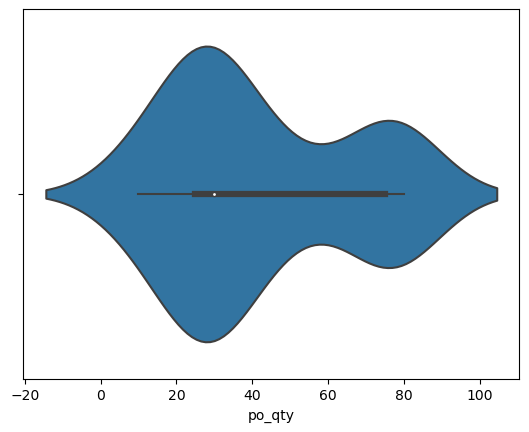

In [285]:

if 'o2d_' in al.columns:
    sns.violinplot(data=al, x='po_qty')
    plt.show()
else:
    print("Column 'o2d_' does not exist in the DataFrame.")


In [286]:
#### Aluminium

al = df[df['category'] == 'RMC - Aluminium']
bins = [0, 33, 66, 1000]
labels = ['0-33', '34-66', '67-100']
al['%_bucket'] = pd.cut(al['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)

/tmp/ipykernel_54727/1537444823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al['%_bucket'] = pd.cut(al['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)


In [287]:
cols = ['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "po_ts_to_expected_reporting", "transporter_time", 
            'vehicle_reported_to_load_tat', "vehicle_loaded_to_dispatch_tat",
                          'seller_total_time']

al.groupby(['category', '%_bucket'])[cols].mean().round(2).T

/tmp/ipykernel_54727/2710642072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  al.groupby(['category', '%_bucket'])[cols].mean().round(2).T


category                       RMC - Aluminium              
%_bucket                                  0-33  34-66 67-100
o2d_                                      5.03   3.97   2.27
po_qty                                   62.50  70.00  32.36
nextbuy_order_indent_tat                  0.91   0.34   0.38
nextbuy_vehicle_indent_tat                0.00   1.36   0.90
po_ts_to_expected_reporting               1.53   2.53   2.20
transporter_time                          0.65  -0.11   0.15
vehicle_reported_to_load_tat              0.07   0.20   0.20
vehicle_loaded_to_dispatch_tat            0.27   0.20   0.32
seller_total_time                         0.34   0.39   0.52

In [288]:
#### Aluminium

al = non_april[non_april['category'] == 'RMC - Aluminium']
bins = [0, 33, 66, 1000]
labels = ['0-33', '34-66', '67-100']
al['%_bucket'] = pd.cut(al['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)
al.groupby(['category', '%_bucket'])[cols].mean().round(2).T

/tmp/ipykernel_54727/1950337978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al['%_bucket'] = pd.cut(al['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_54727/1950337978.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  al.groupby(['category', '%_bucket'])[cols].mean().round(2).T


category                       RMC - Aluminium              
%_bucket                                  0-33  34-66 67-100
o2d_                                      5.03   4.96   2.06
po_qty                                   62.50  75.00  32.11
nextbuy_order_indent_tat                  0.91   0.49   0.30
nextbuy_vehicle_indent_tat                0.00   2.04   0.94
po_ts_to_expected_reporting               1.53   3.21   1.91
transporter_time                          0.65   0.06   0.25
vehicle_reported_to_load_tat              0.07   0.23   0.21
vehicle_loaded_to_dispatch_tat            0.27   0.25   0.36
seller_total_time                         0.34   0.48   0.56

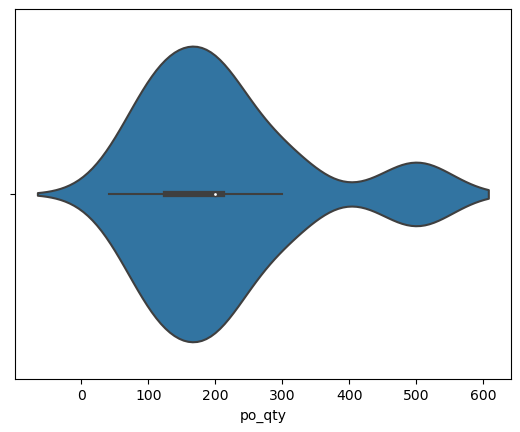

In [289]:
st = non_april[non_april['category'] == 'RMC - Steel']

if 'o2d_' in al.columns:
    sns.violinplot(data=st, x='po_qty')
    plt.show()
else:
    print("Column 'o2d_' does not exist in the DataFrame.")


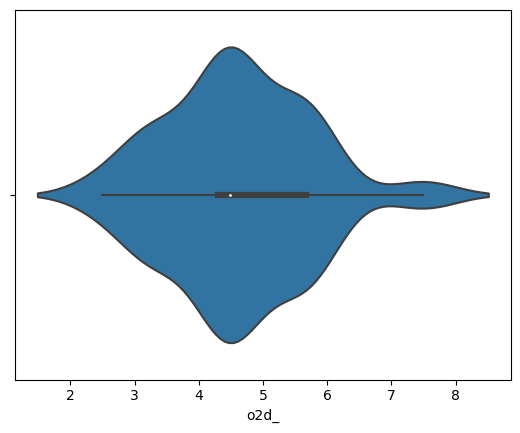

In [290]:
st = non_april[non_april['category'] == 'RMC - Steel']

if 'o2d_' in al.columns:
    sns.violinplot(data=st, x='o2d_')
    plt.show()
else:
    print("Column 'o2d_' does not exist in the DataFrame.")


In [294]:
#### Steel
bins = [0, 20, 40, 60, 80, 1000]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

st['%_bucket'] = pd.cut(st['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)
st.groupby(['category', '%_bucket'])[cols].mean().round(2).T

/tmp/ipykernel_54727/3084238199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['%_bucket'] = pd.cut(st['qty_%'], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_54727/3084238199.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  st.groupby(['category', '%_bucket'])[cols].mean().round(2).T


category                       RMC - Steel                                
%_bucket                              0-20   21-40   41-60   61-80  81-100
o2d_                                  4.83    4.65    4.75    4.65    4.41
po_qty                              344.29  244.40  184.67  176.36  160.53
nextbuy_order_indent_tat             -0.02    0.39    0.06    0.70    0.44
nextbuy_vehicle_indent_tat            0.32    0.15    0.04    0.02    0.03
po_ts_to_expected_reporting           1.03    1.43    1.27    1.48    1.50
transporter_time                      2.39    2.67    2.89    2.69    2.68
vehicle_reported_to_load_tat          0.35    0.68    0.55    0.67    0.56
vehicle_loaded_to_dispatch_tat        0.37    0.34    0.29    0.25    0.21
seller_total_time                     0.72    1.02    0.83    0.93    0.78

In [292]:
df.pivot_table(index = 'category', columns = 'Month', aggfunc = {'o2d_'  :'mean'})

o2d_                              
Month                April      July      June       May
category                                                
RMC - Aluminium   2.996201  0.665051  1.888889  3.809377
RMC - Steel      14.636520  4.991320  4.897525  3.074483

In [293]:
st.pivot_table(index = 'route', columns = [ '%_bucket'], aggfunc = {'o2d_' : 'mean', 'po_qty':'mean'} ).round(2)

o2d_                          po_qty                 \
%_bucket               0-20 21-40 41-60 61-80 81-100   0-20  21-40   41-60   
route                                                                        
bardhman-jaipur         NaN  3.33   NaN  3.33   3.33    NaN  126.0     NaN   
burdwan-jaipur          NaN   NaN   NaN  5.66    NaN    NaN    NaN     NaN   
burdwan-sikendarabad    NaN  4.99   NaN  4.99   4.99    NaN  126.0     NaN   
champa-ahmndabad        NaN   NaN   NaN   NaN    NaN    NaN  126.0     NaN   
champa-bavla            NaN   NaN   NaN   NaN    NaN  500.0    NaN     NaN   
champa-bhyla            NaN   NaN   NaN   NaN    NaN  500.0  500.0     NaN   
durgapur-beawer         NaN   NaN   NaN   NaN   3.00    NaN    NaN     NaN   
durgapur-jaipur         NaN  4.49  4.44  4.49   4.16    NaN  163.0  122.67   
durgapur-pali           NaN  4.67   NaN  4.67   4.67    NaN  126.0     NaN   
durgapur-sikendarabad  5.70  5.70  5.70  5.70   5.70  300.0  300.0  300.00   
raipur-ahmedabad       4.49  4.49  4.49  4.49   4.49  200.0  200.0  200.00   
raipur-bavla            NaN   NaN  4.49   NaN   4.49    NaN    NaN   84.00   
raipur-jalna           4.30  4.30  4.30  4.30   4.30  210.0  210.0  210.00   
raipur-mehsana          NaN   NaN   NaN   NaN    NaN  200.0  200.0  200.00   
ramgarh-jaipur          NaN  4.33   NaN  4.33   4.33    NaN  126.0     NaN   

                                     
%_bucket               61-80 81-100  
route                                
bardhman-jaipur        126.0  126.0  
burdwan-jaipur         200.0    NaN  
burdwan-sikendarabad   126.0  126.0  
champa-ahmndabad         NaN    NaN  
champa-bavla             NaN    NaN  
champa-bhyla             NaN    NaN  
durgapur-beawer          NaN   42.0  
durgapur-jaipur        163.0  142.0  
durgapur-pali          126.0  126.0  
durgapur-sikendarabad  300.0  300.0  
raipur-ahmedabad       200.0  200.0  
raipur-bavla             NaN   84.0  
raipur-jalna           210.0  210.0  
raipur-mehsana         200.0    NaN  
ramgarh-jaipur         126.0  126.0

In [296]:
al.pivot_table(index = 'order_type', columns = [ '%_bucket'], aggfunc = {'o2d_' : 'mean', 'po_qty':'mean'} ).round(2)

o2d_              po_qty             
%_bucket    0-33 34-66 67-100   0-33 34-66 67-100
order_type                                       
S2B         5.03  4.96   2.63   62.5  75.0  36.82
W2B          NaN   NaN   0.50    NaN   NaN  22.50